In [42]:
import tensorflow as tf
import os
import time

In [43]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [44]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [45]:
import cv2
import imghdr

In [46]:
data_dir = 'archive' 


In [47]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [48]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
data = tf.keras.utils.image_dataset_from_directory('archive')

Found 400 files belonging to 2 classes.


In [51]:
data_iterator = data.as_numpy_iterator()

In [52]:
data_iterator

In [53]:
batch= data_iterator.next()

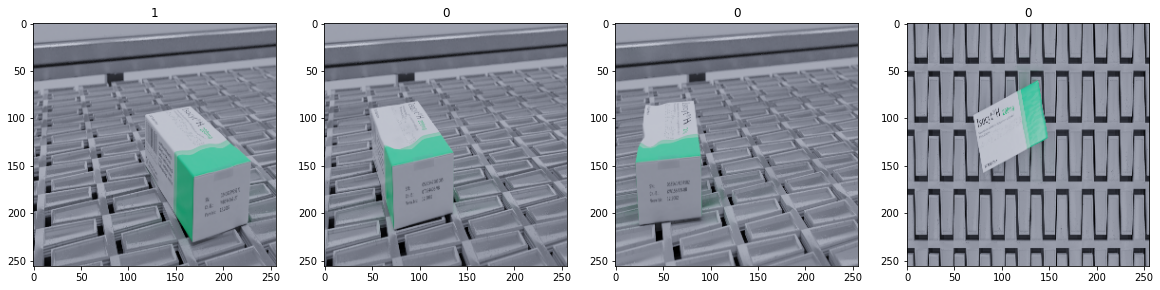

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [55]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [57]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [58]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [60]:
model = Sequential()

In [61]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
9/9 [==============================] - 2s 200ms/step - loss: 0.6127 - accuracy: 0.6667 - val_loss: 0.6170 - val_accuracy: 0.6875
Epoch 2/40
9/9 [==============================] - 2s 190ms/step - loss: 0.6473 - accuracy: 0.6354 - val_loss: 0.6426 - val_accuracy: 0.6406
Epoch 3/40
9/9 [==============================] - 2s 186ms/step - loss: 0.6410 - accuracy: 0.6285 - val_loss: 0.6454 - val_accuracy: 0.6250
Epoch 4/40
9/9 [==============================] - 2s 186ms/step - loss: 0.6322 - accuracy: 0.6181 - val_loss: 0.5570 - val_accuracy: 0.7188
Epoch 5/40
9/9 [==============================] - 2s 186ms/step - loss: 0.6138 - accuracy: 0.6493 - val_loss: 0.5502 - val_accuracy: 0.6875
Epoch 6/40
9/9 [==============================] - 2s 197ms/step - loss: 0.6188 - accuracy: 0.6319 - val_loss: 0.6029 - val_accuracy: 0.7188
Epoch 7/40
9/9 [==============================] - 4s 319ms/step - loss: 0.6001 - accuracy: 0.6632 - val_loss: 0.5719 - val_accuracy: 0.7188
Epoch 8/40
9/9 [====

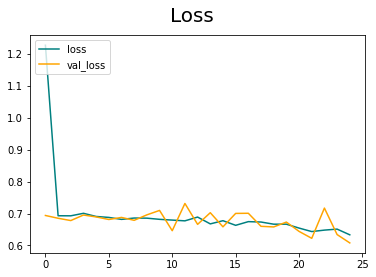

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

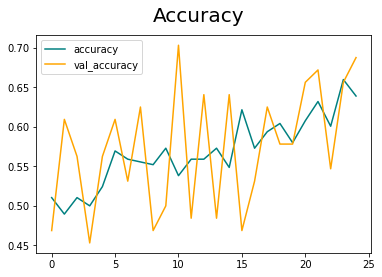

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 255ms/step


In [71]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6, shape=(), dtype=float32) tf.Tensor(0.625, shape=(), dtype=float32) tf.Tensor(0.6041667, shape=(), dtype=float32)


In [72]:
import cv2

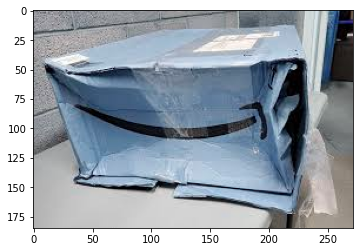

In [120]:
img = cv2.imread('packagetest/images.jpg')
plt.imshow(img)
plt.show()


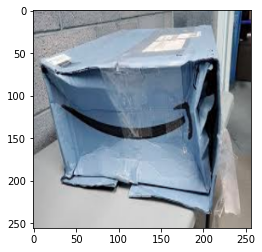

In [121]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [122]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [123]:
if yhat > 0.3: 
    print(f'Predicted class is Intact')
else:
    print(f'Predicted class is Damaged')

Predicted class is Damaged


In [124]:
yhat

array([[0.03819311]], dtype=float32)